## Pre-Lecture Homework

**Question 1.** 

The standard deviation of the original data (SD) is used to measure the variations in a dataset, telling you how spread out individual data points are from the mean. When the standard deviation is large, this can be interpreted as the data points being spread out far from the mean, and when it is small, the data points can be interpreted as being close to the mean. SD applies to the entire sample or population. The standard error of the mean (SEM), on the other hand, is a measurement of how much the sample mean of the data likely differs from the true population mean. When the sample size increases, SEM gets smaller, indicating that, with more data, the sample mean has a higher degree of accuracy as it is closer to the true population mean. Therefore, the key distinction between SD and SEM is that SD focuses on the spread of data points from the mean and SEM focuses on the accuracy of the mean.

ChatGPT Summary 

In this session, we discussed the difference between the standard deviation (SD) and the standard error of the mean (SEM). Here's a summary:

- Standard Deviation (SD) measures the spread or variation of individual data points around the mean. It captures the variation within the data.
- Standard Error of the Mean (SEM) measures the accuracy of the sample mean as an estimate of the population mean. It captures the precision of the sample mean and decreases as sample size increases.
- The key distinction is that SD tells you how spread out the data is, while SEM tells you how accurate your sample mean is likely to be.

This session helped clarify these distinct concepts, focusing on the ideas each metric captures.

https://chatgpt.com/share/66ff00d6-a0a0-8006-b557-3b0b9776f204

## Post-Lecture Homework


**Question 6.**

**What is the process of bootstrapping?** <br>

Bootstrapping is essentially a way to estimate the reliability or accuracy of statistics, like the mean or median, by using your original data to repeatedly create new samples and see how the statistic changes with each sample. The process of bootstrapping includes:

<br>1. Start with your original data set, which is considered the "original sample."
<br>2. Create the "Bootstrap Samples," also known as the new samples. This can be done by selecting observations from the original data set with replacement. In simple words, select random data points from the set, and after selecting a point, put it back into the original data set so it can be picked multiple times for other samples.
<br>3. Calculate the statistic you are observing for each bootstrap sample, like the mean, median, standard deviation, etc. Repeat the process of resampling and recalculating several times to get the bootstrap distribution of your statistic. This distribution shows how the statistic varies when sampling from original data, which helps understand its variability. 
<br>4. Using the Bootstrap distribution of the statistic, estimate the standard errors and draw conclusions about the larger population from which the original data was taken.


**What is the main purpose of bootstrapping?**

The main purpose of bootstrapping is to estimate the reliability of a statistic by repeatedly sampling from the data. This is useful in understanding the uncertainty of the estimate without requiring you to assume that the data follows a certain distribution. 

**If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

I would calculate the mean of my original sample and create many bootstrap samples from it. Then, I would calculate the mean of each bootstrap sample and collect them to form a bootstrap distribution. After, I would calculate the confidence intervals from this distribution like the 2.5 and 97.5 percentiles, which would give me a range of where the true popluation mean lies. Lastly, I would check if the hypothesized mean falls within the range or the confidence interval I found. If it does, then the hypothesized guess is plausible, and if it doesn't, it is not plausible. 

ChatGPT Summary 

In this session, we discussed the following topics:

1. Standard Deviation vs. Standard Error**: We explored the differences between standard deviation (SD), which measures the spread of individual data points, and standard error of the mean (SEM), which measures the accuracy of the sample mean as an estimate of the population mean.

2. Bootstrapping**: We defined bootstrapping as a method for estimating the reliability of a statistic by resampling data with replacement. The main purpose is to assess the variability of statistics without strong assumptions about the underlying population.

3. Bootstrapping Process**: We outlined the steps involved in bootstrapping, including resampling, calculating statistics, and creating a bootstrap distribution.

4. Bootstrap Distribution and Inference**: We explained how the bootstrap distribution is used to calculate confidence intervals and make inferences about the population, such as checking if a hypothesized average falls within the calculated confidence interval.

5. Confidence Intervals**: We clarified how to calculate confidence intervals by finding specific percentiles (e.g., 2.5th and 97.5th) from the bootstrap distribution.

This summary captures the key points and concepts we covered during our discussion.

https://chatgpt.com/share/66ff00d6-a0a0-8006-b557-3b0b9776f204

**Question 8.** 

**Problem Introduction**
The objective of this analysis is to determine whether the vaccine developed by AliTech is effective. A sample of patients was observed before and after vaccination, and health scores were recorded. The null hypothesis in this situation is that the vaccine does not have an effect on the health score; therefore, the final health score is not significantly different from the initial. It states that any observed differences in health scores before and after vaccination are due to random chance rather than the vaccine itself. 

The mean of HealthScoreChange is: 3.3


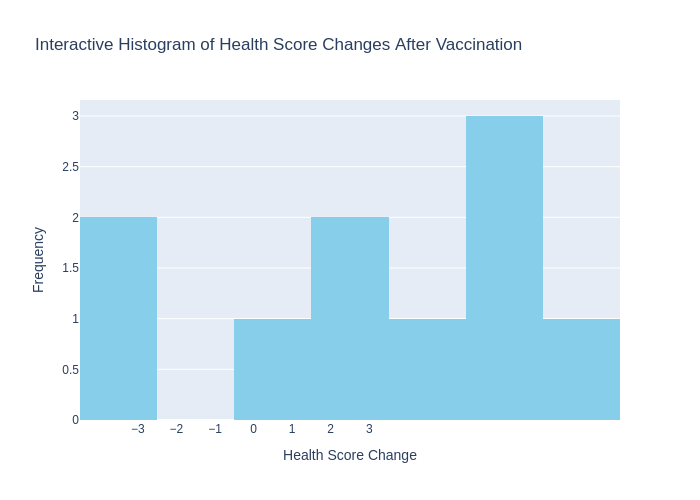

In [1]:
import pandas as pd
import plotly.express as px
from scipy import stats
import numpy as np

# Create a DataFrame with the provided data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Step 2: Calculate the change in health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 4: Calculate the mean of HealthScoreChange
mean_health_score_change = df['HealthScoreChange'].mean()

# Print the mean
print(f"The mean of HealthScoreChange is: {mean_health_score_change}")

# Step 3: Create an interactive histogram
fig = px.histogram(
    df, 
    x='HealthScoreChange', 
    nbins=10, 
    title='Interactive Histogram of Health Score Changes After Vaccination',
    labels={'HealthScoreChange': 'Health Score Change'},
    color_discrete_sequence=['skyblue'],
)

# Update layout
fig.update_layout(
    xaxis_title='Health Score Change',
    yaxis_title='Frequency',
    xaxis=dict(tickvals=list(range(-3, 4))),  # Set x-ticks from -3 to 3
    hovermode='x unified'
)

# Show the plot
fig.show(renderer = "png")



This histogram of health scores gives insight into the distribution of the health score changes experienced by patients after they have been vaccinated. Most people had a health score change of 3, suggesting a potential positive effect for the vaccine. 

**Quantitative Analysis**

95% Confidence Interval for the mean difference: [0.80, 5.50]


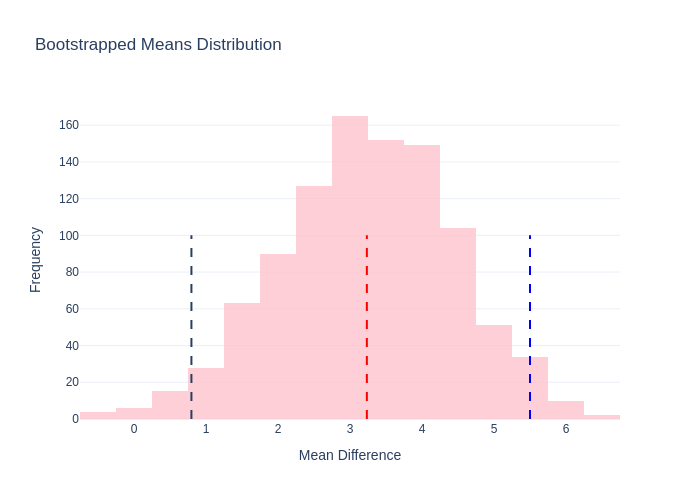

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Step 1: Create the DataFrame from the provided CSV data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Step 2: Calculate the difference in health scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Step 3: Bootstrapping function
def bootstrap(data, num_iterations=1000):
    boot_means = [] #Empty list is created to store the bootsstrapped means
    for _ in range(num_iterations): #repears the process for 1000 interactions
        sample = np.random.choice(data, size=len(data), replace=True) # randomly smaples from the data with replacement
        boot_means.append(np.mean(sample)) #calculates mean
    return boot_means #returns the list of the bootstrapped means

##This function generates bootstrap samples from the original health score changes and calculates the mean for each sample.


# Step 4: Bootstrap the health score changes
boot_means = bootstrap(data['HealthScoreChange'])
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f'95% Confidence Interval for the mean difference: [{ci_lower:.2f}, {ci_upper:.2f}]')

# Step 5: Create an interactive histogram using Plotly
fig = go.Figure()

# Add histogram trace
fig.add_trace(go.Histogram(
    x=boot_means,
    nbinsx=30,
    name='Bootstrapped Means',
    marker=dict(color='pink'),
    opacity=0.75
))

# Add vertical lines for mean and confidence intervals
fig.add_shape(type="line",
    x0=np.mean(boot_means), y0=0, x1=np.mean(boot_means), y1=100, 
    line=dict(color="red", width=2, dash="dash"),
    name='Mean'
)
fig.add_shape(type="line",
    x0=ci_lower, y0=0, x1=ci_lower, y1=100, 
    line=dict(color="dark blue", width=2, dash="dash"),
    name='Lower CI'
)
fig.add_shape(type="line",
    x0=ci_upper, y0=0, x1=ci_upper, y1=100, 
    line=dict(color="blue", width=2, dash="dash"),
    name='Upper CI'
)

# Update layout
fig.update_layout(
    title='Bootstrapped Means Distribution',
    xaxis_title='Mean Difference',
    yaxis_title='Frequency',
    hovermode='x',
    template='plotly_white'
)

# Show the figure
fig.show(renderer = "png")


The mean health score change was calculated to measure the average improvement among all patients in the original sample and has a value of 3.3. The bootstrap confidence interval was employed to estimate the confidence interval for this mean, and the 95% confidence interval is between 0.80 and 5.50. This provides a range of values within which we can be 95% confident the true mean change lies.

**Findings and Discussion**

Conclusion regarding a Null Hypothesis of "no effect"

Based on the analysis of examination changes in health scores performed, the vaccine developed by AliTech is effective. The calculated mean health score change resulted in a value of 3.3, and the 95% confidence interval for the mean change was calculated to be [0.80, 5.50]. Since the mean is a positive value and within the confidence interval, this indicates that the vaccination has a positive effect on health scores and that the observed mean is an estimate of the population mean. Therefore, the null hypothesis of "no effect" is not true and that the claim that any observed differences in health scores before and after vaccination is due to random chance rather than the vaccine itself does not hold as shown by the confidence interval.

Further Considerations

Further considerations regarding the vaccine effectiveness are to involve larger sample sizes and longer follow-up periods. This way, there will be a more accurate of evaluation of vaccine's long-term efficacy.